In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tqdm import tqdm_notebook

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
file_path = 'C:/Users/Jacob/Documents/datasets/amsterdamumcdb-1.0.2/'
save_path = 'C:/Users/Jacob/Documents/datasets/amsterdamumcdb-1.0.2-processed/'
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [4]:
adm = pd.read_csv(os.path.join(save_path, 'admissions.csv'))
adm.head()

,Unnamed: 0,patientid,admissionid,admissioncount,location,urgency,origin,admittedat,admissionyeargroup,dischargedat,...,destination,gender,agegroup,dateofdeath,weightgroup,weightsource,heightgroup,heightsource,specialty,icudeath
0,4,4,4,1,IC&MC,0,Verpleegafdeling zelfde ziekenhuis,0,2010-2016,180900000,...,19,Man,70-79,NaN,70-79,Anamnestisch,170-179,Anamnestisch,Cardiochirurgie,False
1,5,5,5,1,IC,1,Eerste Hulp afdeling zelfde ziekenhuis,0,2010-2016,246420000,...,31,Man,50-59,NaN,60-69,Geschat,160-169,Gemeten,Longziekte,False
2,9,9,9,1,IC,0,NaN,0,2003-2009,242040000,...,15,Vrouw,70-79,NaN,70-79,NaN,159-,NaN,Cardiochirurgie,False
3,12,12,12,1,IC,0,NaN,0,2003-2009,627960000,...,29,Man,18-39,NaN,90-99,NaN,NaN,NaN,NaN,False
4,15,14,15,1,IC,1,Eerste Hulp afdeling zelfde ziekenhuis,0,2010-2016,893220000,...,Overleden,Man,60-69,812280000.0,60-69,Geschat,160-169,Geschat,Cardiologie,True


## Numeric items data

In [6]:
adm = pd.read_csv(os.path.join(save_path, "icu", "admissions.csv"))
num_file = os.path.join(file_path, "chartevents.csv")
num_cols = ["subject_id", "hadm_id", "stay_id", "charttime", "itemid", "valuenum", "valueuom"]
chunksize = 100000
cht = []
# ***reading chartevents is slow***
# Documentation says `chartevents.csv` has 264885089 rows, there appear to be ~60 million more
for chunk in tqdm_notebook(pd.read_csv(cht_file, usecols=cht_cols, chunksize=chunksize), total=(327363274//chunksize)+1, smoothing=0.01):
    chunk = chunk[~chunk["valuenum"].isna()]
    chunk = chunk.loc[chunk["hadm_id"].isin(adm["hadm_id"])]
    cht.append(chunk)
# N.B. - ignores "value", so only uses numeric lab values

(4907269, 9)
(2001819, 9)


,admissionid,ordercategoryid,itemid,rate,dose,administered,action,start,stop
192,4,15,9152,0,1.0,1.0,Nieuwe toediening,12780000,12840000
193,4,15,9152,0,1.0,1.0,Nieuwe toediening,34380000,34440000
194,4,15,9152,0,1.0,1.0,Nieuwe toediening,55980000,56040000
195,4,23,7225,NaN,2.5,2.5,Nieuwe toediening,31140000,31200000
196,4,23,7225,NaN,2.5,2.5,Nieuwe toediening,44640000,44700000


In [ ]:
num = pd.concat(num)
num.head()

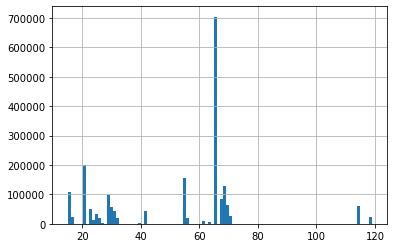

In [8]:
drg["ordercategoryid"].hist(bins=100)